## Question 1

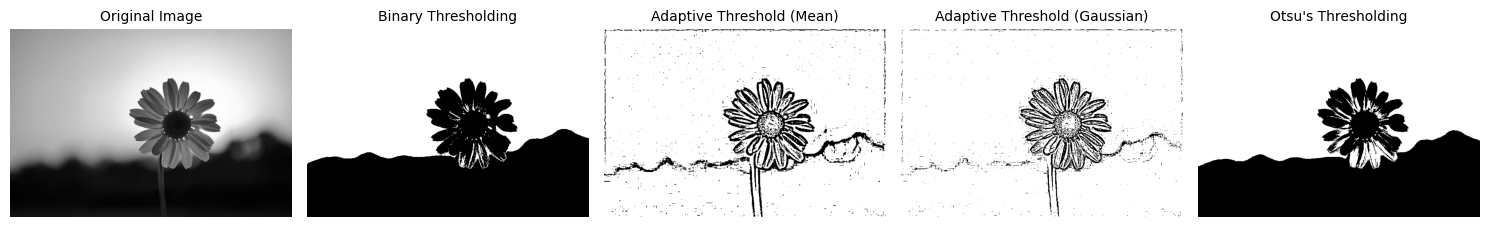

In [10]:
import cv2
import matplotlib.pyplot as plt

image_path = 'q1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh_mean = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original Image', 'Binary Thresholding', 'Adaptive Threshold (Mean)',
          'Adaptive Threshold (Gaussian)', "Otsu's Thresholding"]
images = [image, binary_thresh, adaptive_thresh_mean, adaptive_thresh_gaussian, otsu_thresh]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Question 2

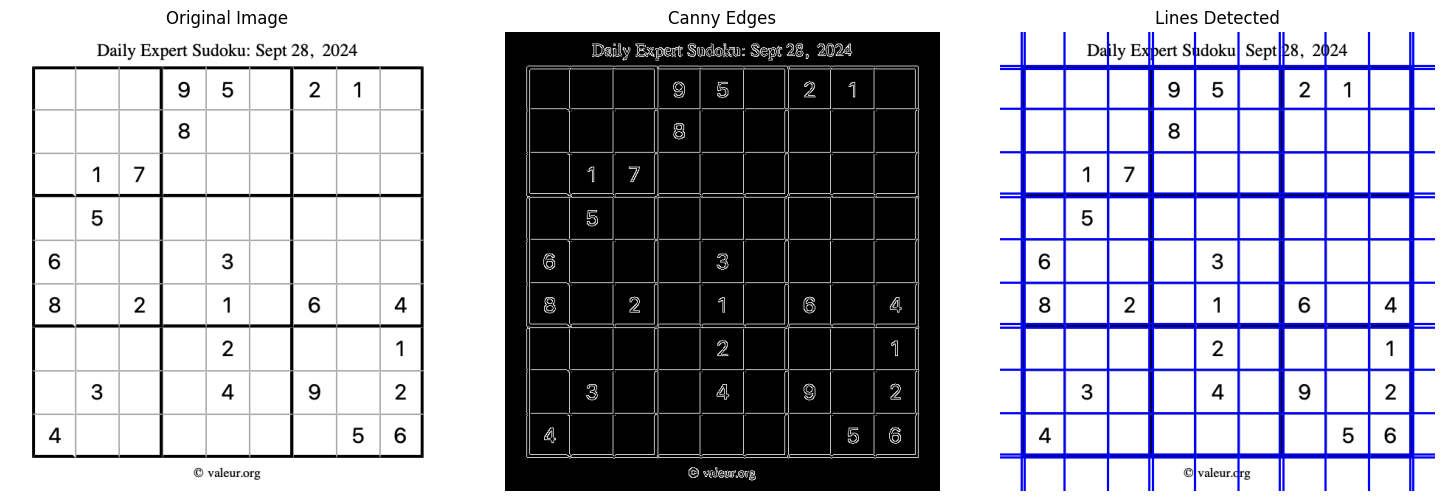

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_highlight_lines(image_path):
    image=cv2.imread(image_path,cv2.IMREAD_COLOR)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges=cv2.Canny(gray,100,200)
    lines=cv2.HoughLines(edges,1,np.pi/180,150)
    image_cp=image.copy()
    if lines is not None:
        for line in lines:
            rho,theta=line[0]
            a=np.cos(theta)
            b=np.sin(theta)
            x0=a*rho
            y0=b*rho
            x1=int(x0+1000*(-b))
            y1=int(y0+1000*(a))
            x2=int(x0-1000*(-b))
            y2=int(y0-1000*(a))
            cv2.line(image_cp,(x1,y1),(x2,y2),(255,0,0),2)
    titles=['Original Image','Canny Edges','Lines Detected']
    images=[image,edges,image_cp]
    plt.figure(figsize=(15,5))
    for i in range(len(images)):
        cmap='gray' if i!=2 else None
        plt.subplot(1,3,i+1)
        plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB),cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

test_image_path='sudoku.png'
detect_and_highlight_lines(test_image_path)

## Question 3

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def detect_circles(image_path, dp=1.2, min_dist=20, param1=50, param2=30, min_radius=0, max_radius=0):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray,(9,9),2)

    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp, min_dist,
                               param1=param1, param2=param2,
                               minRadius=min_radius, maxRadius=max_radius)

    output_image = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0,:]:
            center = (circle[0],circle[1])
            radius = circle[2]
            cv2.circle(output_image,center,radius,(0,255,0),2)
            cv2.circle(output_image,center,2,(0,0,255),3)

    return image, output_image

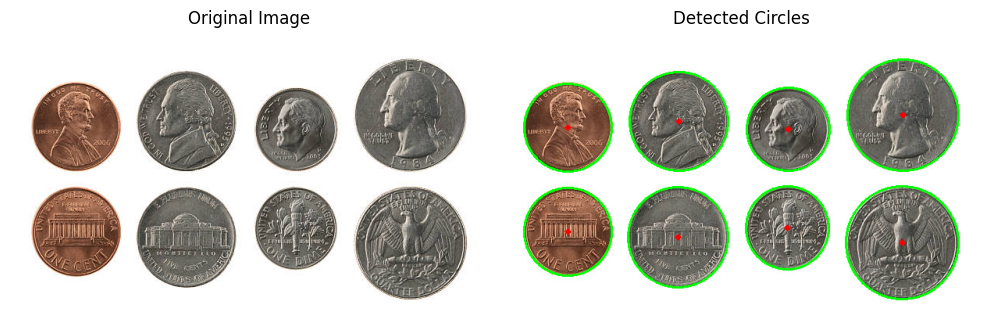

In [4]:
original_image, detected_circles_image = detect_circles(
    "coin.jpg", dp=1.1, min_dist=30, param1=50, param2=30, min_radius=40, max_radius=75
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_circles_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")

plt.tight_layout()
plt.show()

### with different parameters min_radius changed

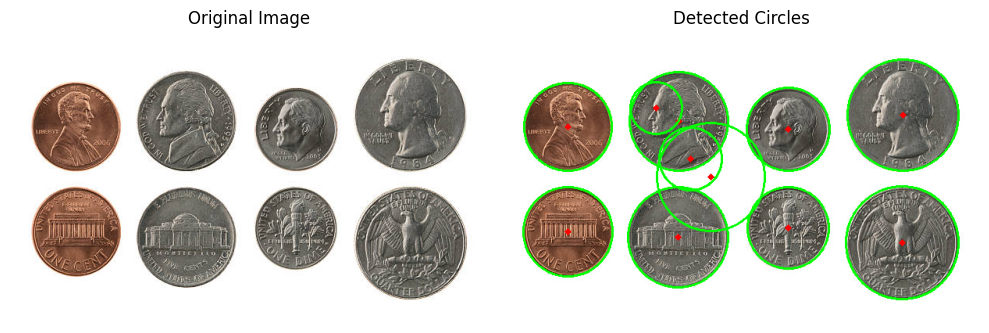

In [5]:
original_image, detected_circles_image = detect_circles(
    "coin.jpg", dp=1.1, min_dist=30, param1=50, param2=30, min_radius=30, max_radius=75
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_circles_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")

plt.tight_layout()
plt.show()

### with different parameters dp changed

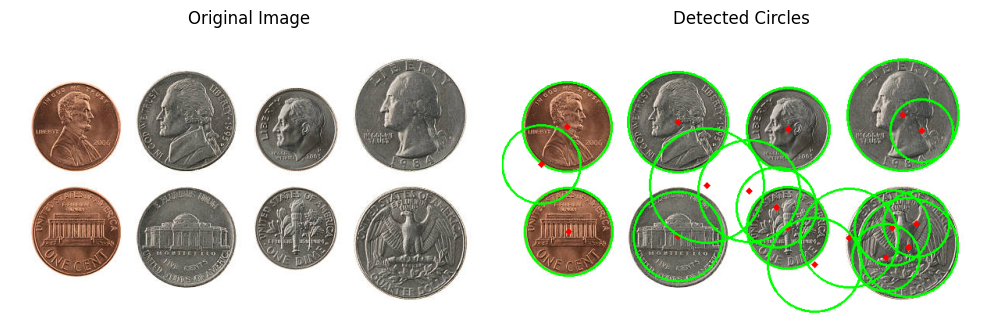

In [6]:
original_image, detected_circles_image = detect_circles(
    "coin.jpg", dp=1.4, min_dist=30, param1=50, param2=30, min_radius=40, max_radius=75
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_circles_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")

plt.tight_layout()
plt.show()

### with different parameters min_dist changed

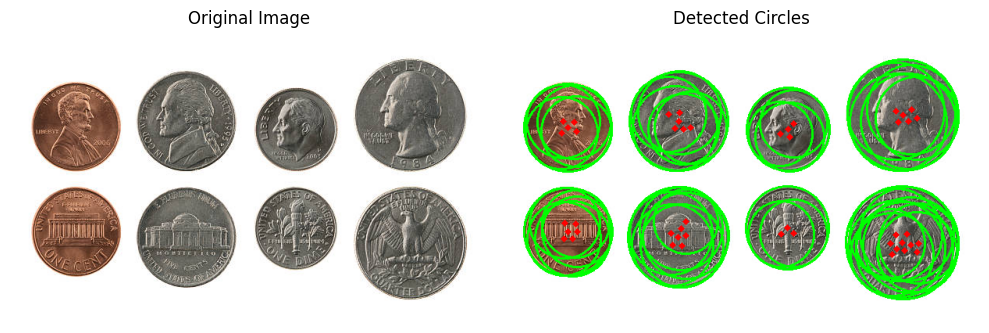

In [7]:
original_image, detected_circles_image = detect_circles(
    "coin.jpg", dp=1.1, min_dist=10, param1=50, param2=30, min_radius=40, max_radius=75
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_circles_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")

plt.tight_layout()
plt.show()

### C

1. min_dist: Increasing min_dist avoids detecting overlapping circles.
2. min_radius and max_radius: Setting appropriate radius ranges filters out irrelevant detections.
3. Setting a proper min_radius and max_radius eliminates false positives and noise.
4. Lowering param2 detects more circles but introduces noise, while increasing it ensures only strong circles are retained.

## Question 4

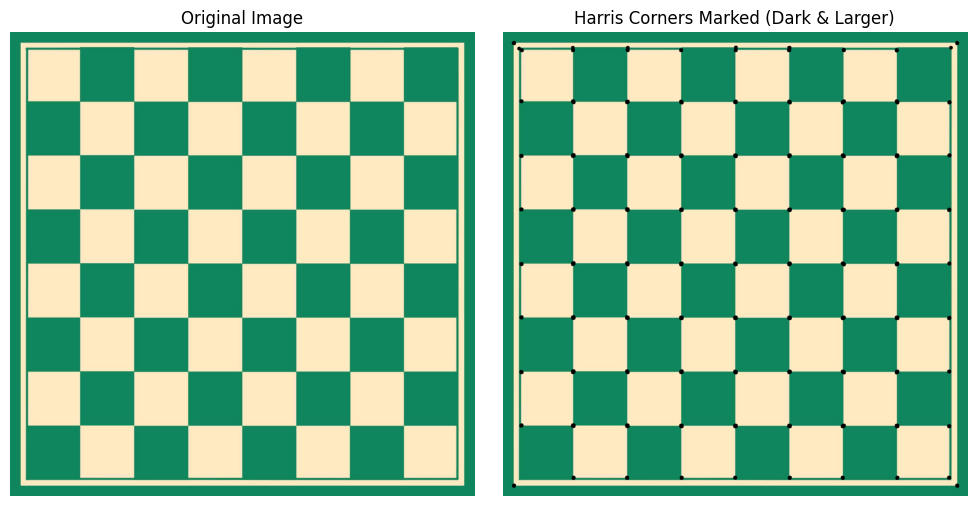

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path, block_size=2, ksize=3, k=0.04):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    harris_corners = cv2.cornerHarris(gray, block_size, ksize, k)

    harris_corners = cv2.dilate(harris_corners, None)

    corner_marked_image = image.copy()
    corner_locations = np.argwhere(harris_corners > 0.01 * harris_corners.max())
    for loc in corner_locations:
        cv2.circle(corner_marked_image, (loc[1], loc[0]), radius=5, color=(0, 0, 0), thickness=-1)

    return image, corner_marked_image

image_path = "Chessboard.jpeg"
original_image, corners_marked_image = harris_corner_detection(
    image_path, block_size=2, ksize=3, k=0.04
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corners_marked_image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners Marked (Dark & Larger)")
plt.axis("off")

plt.tight_layout()
plt.show()

## Question 5

The Hough Transform (HT) is a feature extraction technique that differs in complexity and parameter space when detecting lines versus circles.

For **lines**, the parameter space is two-dimensional (\( \rho, \theta \)), where \( \rho \) is the perpendicular distance from the origin, and \( \theta \) is the line’s orientation. Edge points in the image map to sinusoids in this space, and intersections of these sinusoids indicate the presence of a line.

For **circles**, the parameter space becomes three-dimensional (\( x_{\text{center}}, y_{\text{center}}, r \)), representing the circle’s center and radius. Each edge point maps to a cone in the parameter space, significantly increasing computational complexity, especially when searching over a range of radii. The higher-dimensional accumulator array and iterative radius checks make circle detection more resource-intensive than line detection. Techniques like fixing the radius or using gradient information can reduce the computational load.
